In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical/medical_clean.csv')

In [3]:
df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8', 'City','State','County','Zip','Lat','Lng','Population','TimeZone','Additional_charges','TotalCharge','Services','Interaction',
'UID', 'Customer_id','Job','Income', 'Marital', 'CaseOrder', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink','Initial_admin', 'Initial_days', 'Area','Children'],axis = 1, inplace = True)

In [4]:
df.isna().any()

Age                   False
Gender                False
ReAdmis               False
VitD_levels           False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   ReAdmis             10000 non-null  object 
 3   VitD_levels         10000 non-null  float64
 4   HighBlood           10000 non-null  object 
 5   Stroke              10000 non-null  object 
 6   Complication_risk   10000 non-null  object 
 7   Overweight          10000 non-null  object 
 8   Arthritis           10000 non-null  object 
 9   Diabetes            10000 non-null  object 
 10  Hyperlipidemia      10000 non-null  object 
 11  BackPain            10000 non-null  object 
 12  Anxiety             10000 non-null  object 
 13  Allergic_rhinitis   10000 non-null  object 
 14  Reflux_esophagitis  10000 non-null  object 
 15  Asthma              10000 non-null  object 
dtypes: fl

In [6]:
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Gender', 'ReAdmis', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [7]:
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Age', 'VitD_levels'], dtype='object')


In [8]:
df.describe()

,Age,VitD_levels
count,10000.000000,10000.000000
mean,53.511700,17.964262
std,20.638538,2.017231
min,18.000000,9.806483
25%,36.000000,16.626439
50%,53.000000,17.951122
75%,71.000000,19.347963
max,89.000000,26.394449


In [9]:
df.groupby('ReAdmis').mean().round(2).T

C:\Users\nsgoo\AppData\Local\Temp\ipykernel_4808\286805396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('ReAdmis').mean().round(2).T


ReAdmis,No,Yes
Age,53.26,53.94
VitD_levels,17.96,17.98


In [10]:
df[NumericalData].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.512,20.639,18.000,36.000,53.000,71.000,89.000
VitD_levels,10000.0,17.964,2.017,9.806,16.626,17.951,19.348,26.394


No     6331
Yes    3669
Name: ReAdmis, dtype: int64


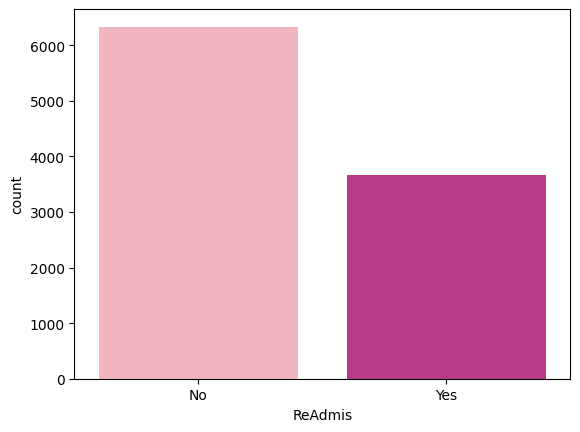

In [11]:
print(df['ReAdmis'].value_counts())
sns.countplot(x = 'ReAdmis', data = df, palette = 'RdPu')
plt.show()

array([[<AxesSubplot: title={'center': 'VitD_levels'}>]], dtype=object)

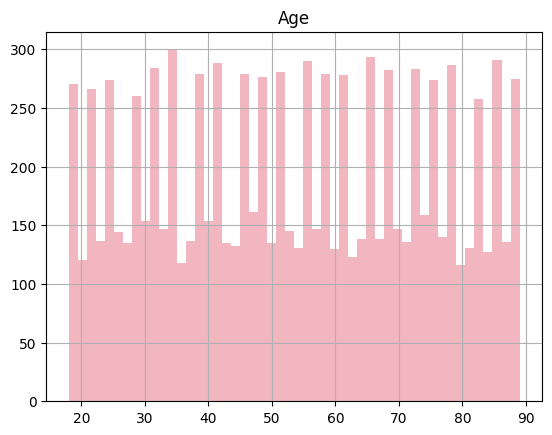

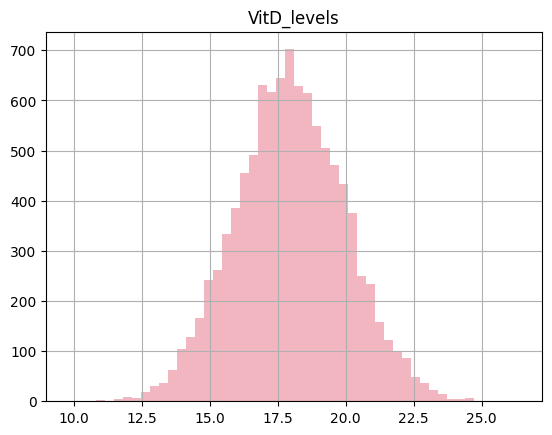

In [12]:
df.hist('Age', bins = 50, color = '#f1b6bf')
df.hist('VitD_levels', bins = 50, color = '#f1b6bf')

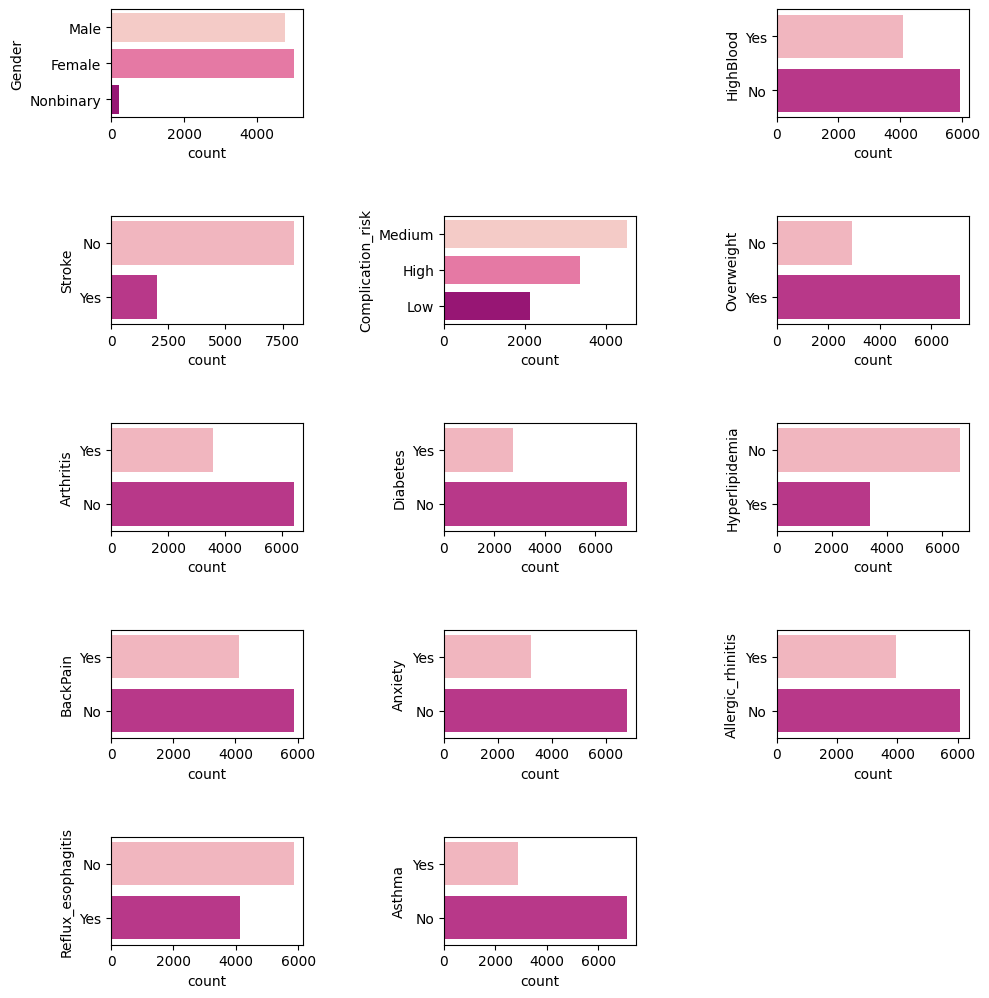

In [13]:
fig = plt.figure(figsize = (10, 20))
for i, col in enumerate(CategoricalData):
    if col != 'ReAdmis':
        plt.subplot(10, 3, i + 1)
        ax = sns.countplot(y = col, data = df, palette = 'RdPu')
        fig.tight_layout(h_pad = 4, w_pad = 4)
plt.show()

<AxesSubplot: xlabel='Asthma'>

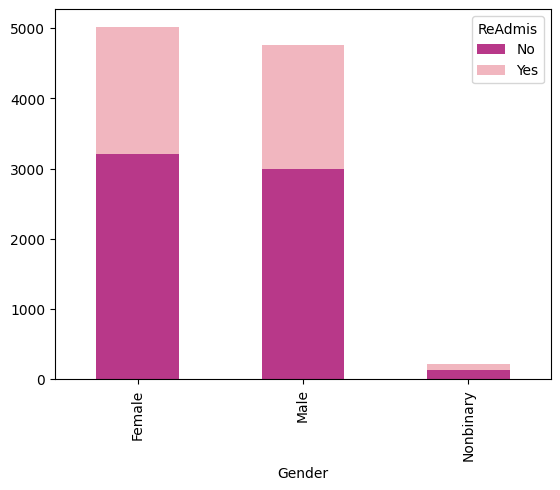

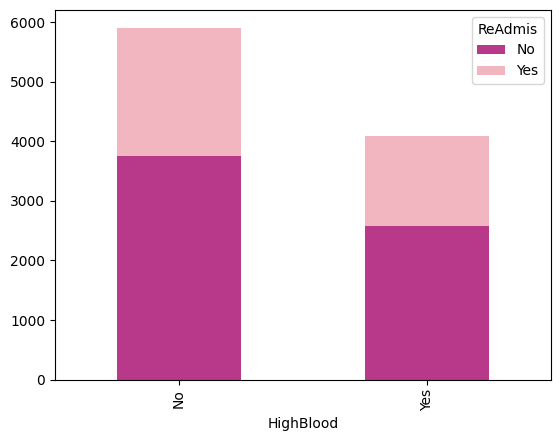

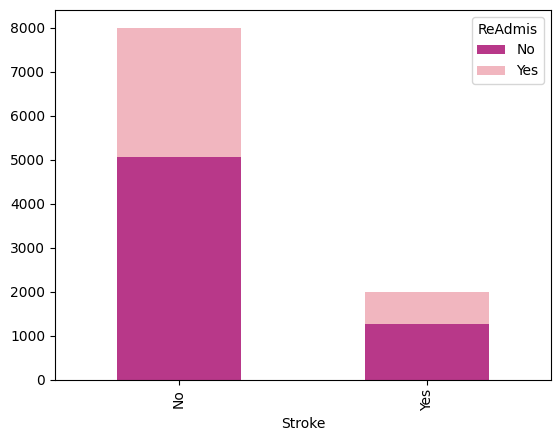

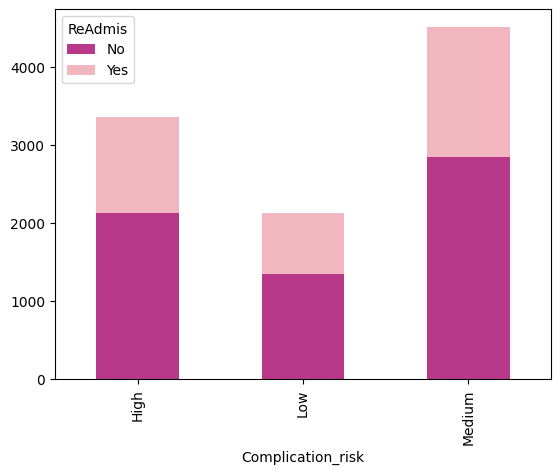

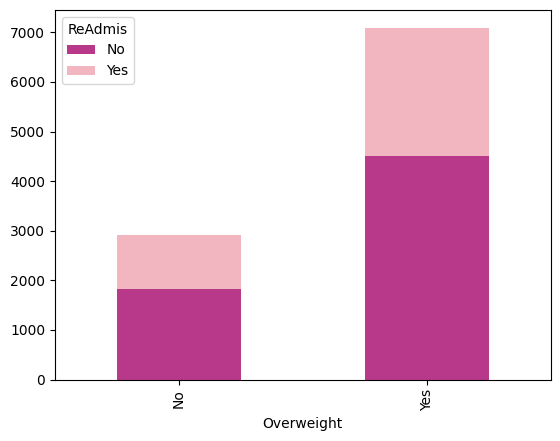

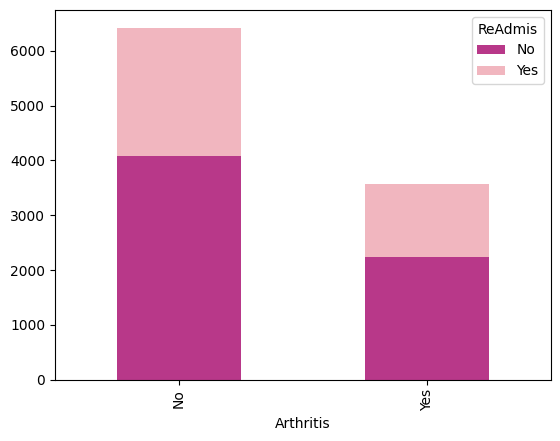

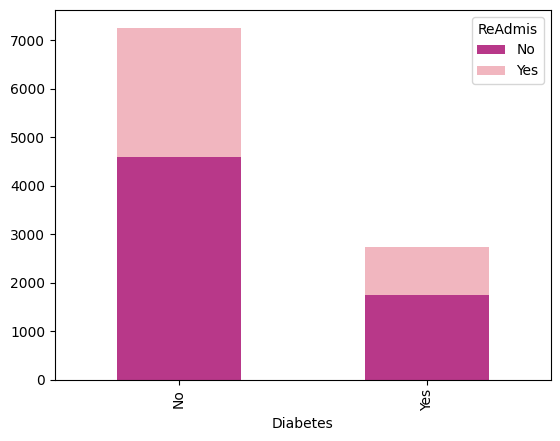

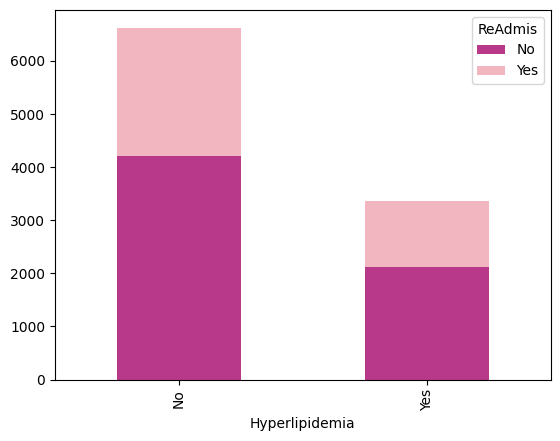

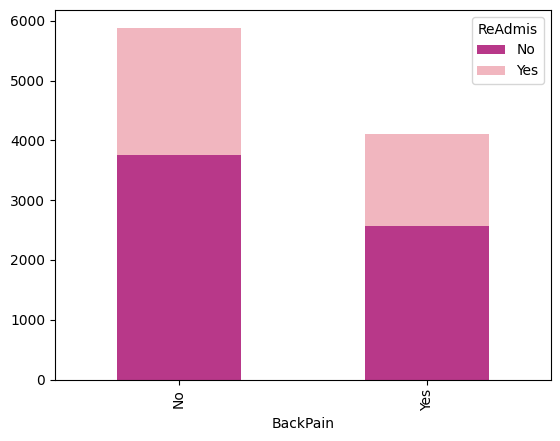

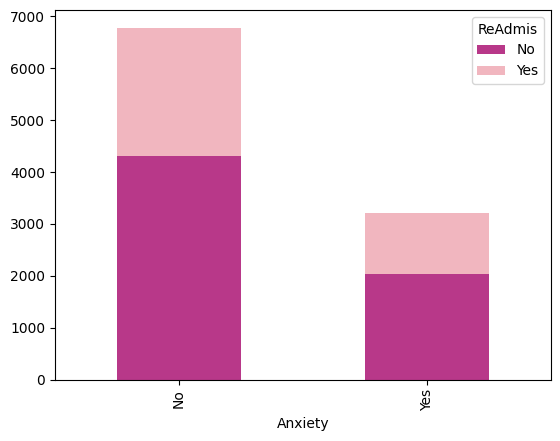

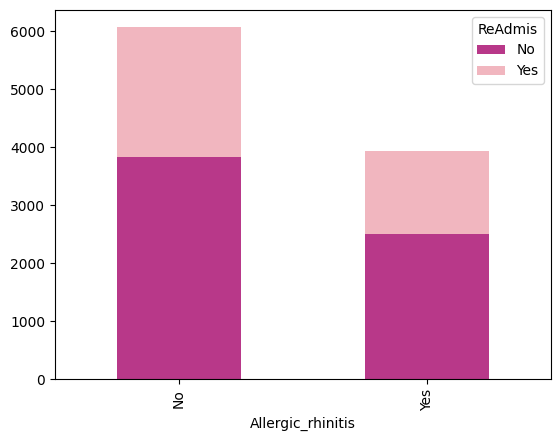

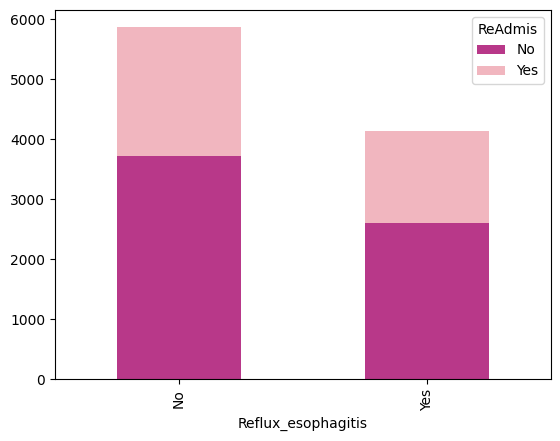

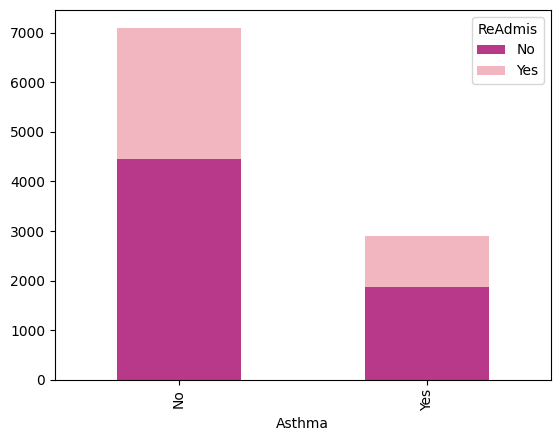

In [14]:
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(), values = 0, index = 'Gender', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(), values = 0, index = 'HighBlood', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(), values = 0, index = 'Stroke', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(), values = 0, index = 'Complication_risk', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(), values = 0, index = 'Overweight', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(), values = 0, index = 'Arthritis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(), values = 0, index = 'Diabetes', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(), values = 0, index = 'Hyperlipidemia', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(), values = 0, index = 'BackPain', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(), values = 0, index = 'Anxiety', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(), values = 0, index = 'Allergic_rhinitis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(), values = 0, index = 'Reflux_esophagitis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(), values = 0, index = 'Asthma', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

In [15]:
df['ReAdmis_plh'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]

<AxesSubplot: xlabel='ReAdmis_plh', ylabel='Age'>

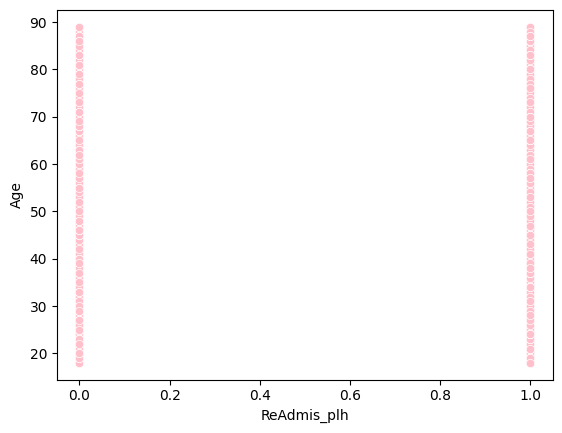

In [16]:
sns.scatterplot(x = df['ReAdmis_plh'], y = df['Age'], color ='pink')

<AxesSubplot: xlabel='ReAdmis_plh', ylabel='VitD_levels'>

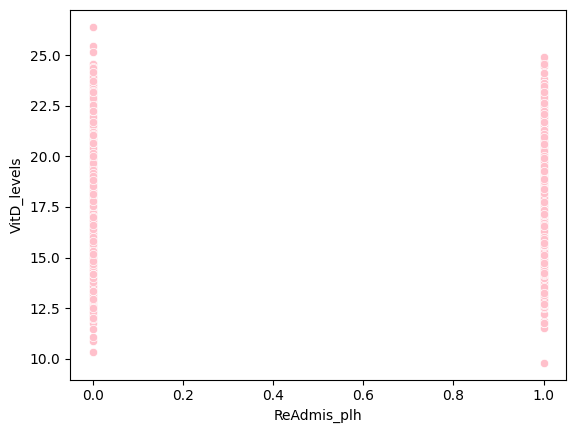

In [17]:
sns.scatterplot(x = df['ReAdmis_plh'], y = df['VitD_levels'], color ='pink')

In [18]:
df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['ReAdmis'] = df['ReAdmis'].replace(['Yes', 'No'] , [1, 2])
df['Gender'] = df['Gender'].replace(['Nonbinary', 'Male', 'Female'] , [0, 1, 2])
df['Complication_risk'] = df['Complication_risk'].replace(['Low', 'Medium', 'High'] , [0, 1, 2])

In [19]:
df = df.drop(['ReAdmis_plh'], axis = 1)
df.head()

,Age,Gender,ReAdmis,VitD_levels,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,53,1,0,19.141466,1,0,1,0,1,1,0,1,1,1,0,1
1,51,2,0,18.940352,1,0,2,1,0,0,0,0,0,0,1,0
2,53,2,0,18.057507,1,0,1,1,0,1,0,0,0,0,0,0
3,78,1,0,16.576858,0,1,1,0,1,0,0,0,0,0,1,1
4,22,2,0,17.439069,0,0,0,0,0,0,1,0,0,1,0,0


In [20]:
df = df[['ReAdmis', 'Age', 'Gender', 'VitD_levels', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
'Asthma']]

In [21]:
df.corr()

,ReAdmis,Age,Gender,VitD_levels,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
ReAdmis,1.000000,0.015810,-0.012504,0.004083,0.002270,0.000918,-0.003236,-0.008586,0.007663,-0.003058,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133
Age,0.015810,1.000000,0.013305,0.010315,0.007147,0.012035,0.002887,-0.008292,0.007110,0.003694,0.003736,0.021081,0.006130,0.012092,-0.019609,0.009229
Gender,-0.012504,0.013305,1.000000,0.007670,-0.011975,0.002112,-0.005150,0.000017,-0.013872,0.002764,-0.019132,0.003996,0.004559,0.003309,0.021234,-0.005627
VitD_levels,0.004083,0.010315,0.007670,1.000000,0.005660,0.006721,0.003787,0.009689,0.000075,-0.025834,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937
HighBlood,0.002270,0.007147,-0.011975,0.005660,1.000000,0.007568,0.021368,0.026231,0.007314,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174
Stroke,0.000918,0.012035,0.002112,0.006721,0.007568,1.000000,0.001119,-0.001011,-0.018438,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443
Complication_risk,-0.003236,0.002887,-0.005150,0.003787,0.021368,0.001119,1.000000,-0.001716,-0.015054,-0.006633,-0.000802,-0.015379,-0.000707,-0.002782,0.003102,-0.008973
Overweight,-0.008586,-0.008292,0.000017,0.009689,0.026231,-0.001011,-0.001716,1.000000,0.003954,-0.007575,-0.006102,0.010083,-0.011186,0.002819,-0.012240,0.013943
Arthritis,0.007663,0.007110,-0.013872,0.000075,0.007314,-0.018438,-0.015054,0.003954,1.000000,0.009097,-0.007130,-0.018804,0.012045,0.008748,0.014894,-0.006423
Diabetes,-0.003058,0.003694,0.002764,-0.025834,-0.005858,0.005792,-0.006633,-0.007575,0.009097,1.000000,0.011739,-0.013405,-0.002529,0.005486,-0.007816,0.016765


In [22]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical_cleaned208_task2_v3.csv', index = False)

In [23]:
df['intercept'] = 1
log_model = sm.Logit(df['ReAdmis'],df[['Age', 'Gender', 'VitD_levels', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
'Reflux_esophagitis', 'Asthma', 'intercept']]).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.656719
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:               0.0008619
Time:                        22:56:23   Log-Likelihood:                -6567.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.7288
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0016      0.001      1.581      0.114      -0.000       0.004
Gende

In [24]:
log_model2 = sm.Logit(df['ReAdmis'],df[['Age', 'Gender', 'BackPain','Asthma','intercept']]).fit()
print(log_model2.summary())

Optimization terminated successfully.
         Current function value: 0.656840
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:               0.0006769
Time:                        22:56:23   Log-Likelihood:                -6568.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.06368
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0016      0.001      1.586      0.113      -0.000       0.004
Gender        -0.0493      0.

In [25]:
matrix_df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical_cleaned208_task2_v3.csv')

In [26]:
matrix_df = df[['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'intercept', 'ReAdmis']]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1262    0]
 [ 738    0]]


<AxesSubplot: >

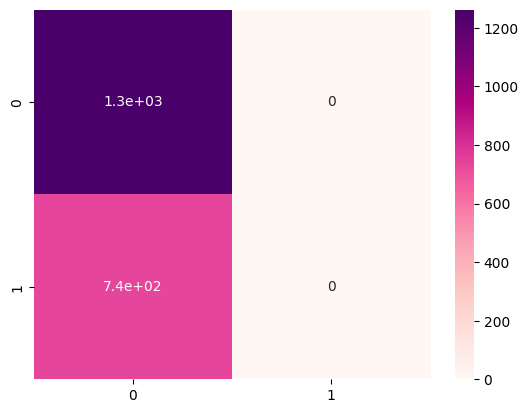

In [31]:
y_predict = classifier.predict(X_test)
y_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(y_matrix, annot = True, cmap = 'RdPu')

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1262
           1       0.00      0.00      0.00       738

    accuracy                           0.63      2000
   macro avg       0.32      0.50      0.39      2000
weighted avg       0.40      0.63      0.49      2000



c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,